# Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'/Users/mimielaurant/Documents/Career Foundry/Immersion_Achievement 6/Citibike Project'

In [4]:
data = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'citibikes_new.csv'))

In [5]:
data.shape

(49977, 22)

In [6]:
data.head()

,Unnamed: 0,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,...,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,age,Trip Range,trip_minutes
0,0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,...,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968-01-01,2,45.692282,long trip,16
1,1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,...,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983-01-01,1,30.699541,average trip,9
2,2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,...,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989-01-01,1,24.714600,average trip,6
3,3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,...,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988-01-01,2,25.743160,average trip,9
4,4,VGBsb5,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,...,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,1978-01-01,0,35.685211,long trip,38


In [7]:
data.columns

Index(['Unnamed: 0', 'trip_id', 'bike_id', 'weekday', 'start_hour',
       'start_time', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_time',
       'end_station_id', 'end_station_name', 'end_station_latitude',
       'end_station_longitude', 'trip_duration', 'subscriber', 'birth_year',
       'gender', 'age', 'Trip Range', 'trip_minutes'],
      dtype='object')

In [8]:
columns_to_drop = ['Unnamed: 0','trip_id', 'bike_id', 'weekday', 'start_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_time', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'trip_duration', 'subscriber', 'birth_year', 'gender', 'Trip Range']

In [9]:
data = data.drop(columns = columns_to_drop)

# Standardization

In [10]:
# round 'age' column to the nearest whole number
data['age'] = data['age'].round()

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
# define standard scaler
scaler = StandardScaler()

In [13]:
# transform data
data2 = scaler.fit_transform(data)

# The Elbow Technique

In [14]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [15]:
score = [kmeans[i].fit(data2).score(data2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/mimielaurant/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mimielaurant/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mimielaurant/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mimielaurant/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

[-149931.0,
 -113752.17904262671,
 -85089.10995235242,
 -61658.400453457885,
 -54768.53606015908,
 -49009.045466198135,
 -45034.0807650877,
 -41237.34615038509,
 -38053.64826820314]

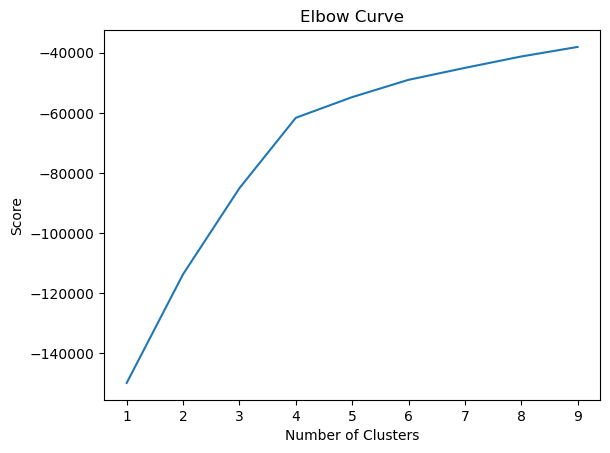

In [16]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Based on this chart, the optimal number of clusters is 4.

# K-means clustering

In [17]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4)

In [18]:
# Fit the k-means object to the data.

kmeans.fit(data2)

/Users/mimielaurant/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [19]:
data['clusters'] = kmeans.fit_predict(data2)

/Users/mimielaurant/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [20]:
data.head()

,start_hour,age,trip_minutes,clusters
0,18,46.0,16,0
1,18,31.0,9,1
2,19,25.0,6,1
3,11,26.0,9,3
4,18,36.0,38,2


In [20]:
data.shape

(49977, 4)

In [21]:
# export 
data.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'clusters.csv'))

In [21]:
data['clusters'].value_counts()

1    18050
3    13496
0    10059
2     8372
Name: clusters, dtype: int64

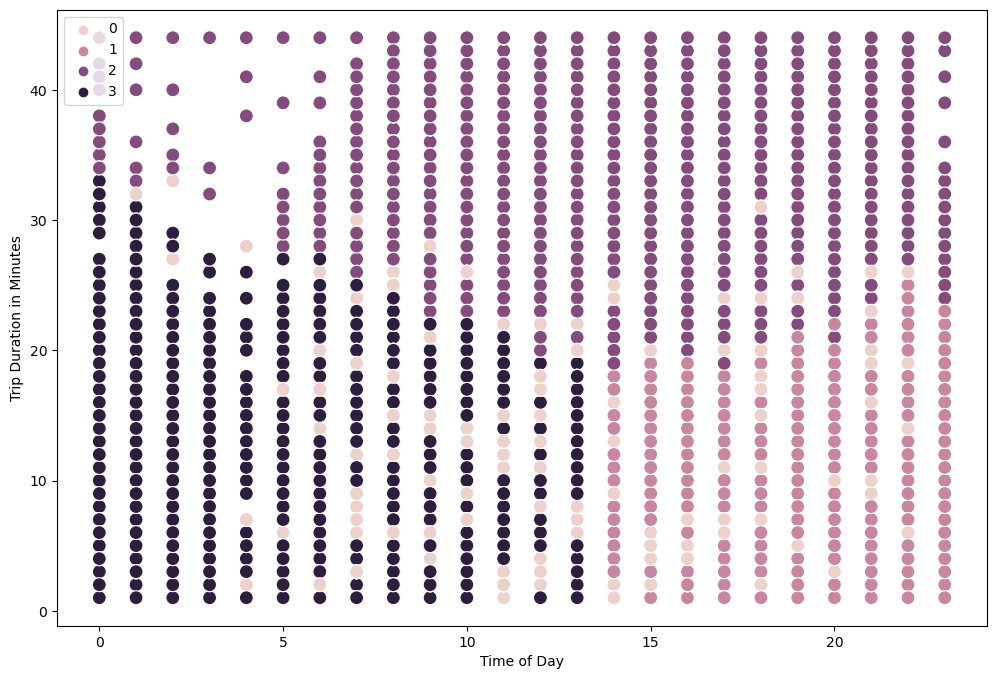

In [22]:
# Plot the clusters for the "Start Hour" and "Trip Minutes" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=data['start_hour'], y=data['trip_minutes'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Time of Day') # Label x-axis.
plt.ylabel('Trip Duration in Minutes') # Label y-axis.
plt.show()

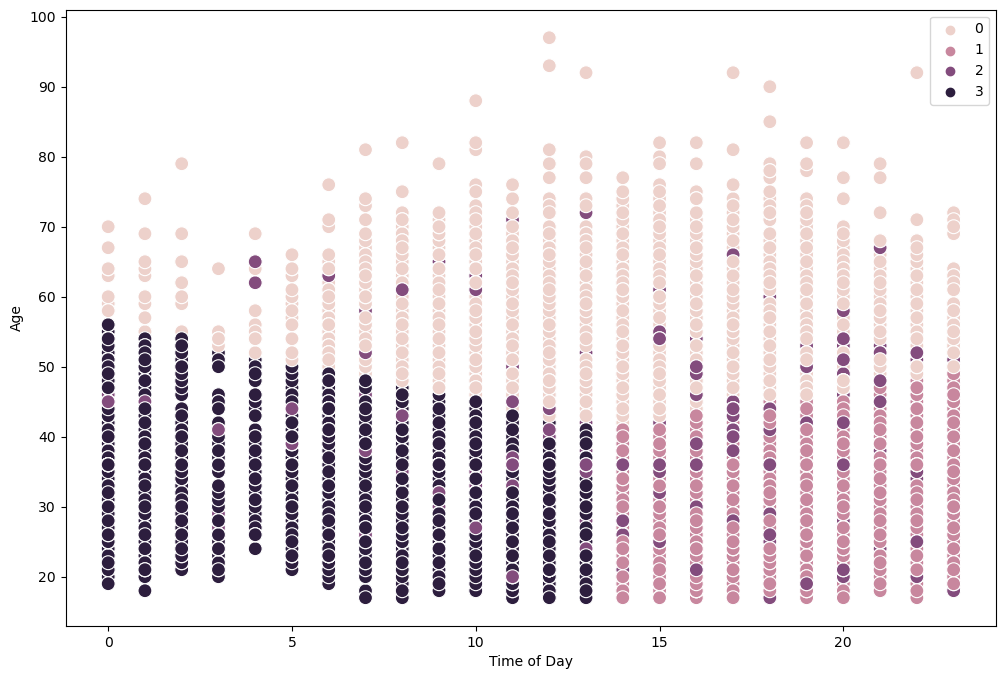

In [23]:
# Plot the clusters for the "Start Hour" and "Age" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=data['start_hour'], y=data['age'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Time of Day') # Label x-axis.
plt.ylabel('Age') # Label y-axis.
plt.show()

In [24]:
data.loc[data['clusters'] == 2, 'cluster'] = 'purple'
data.loc[data['clusters'] == 1, 'cluster'] = 'magenta'
data.loc[data['clusters'] == 0, 'cluster'] = 'pink'
data.loc[data['clusters'] == 3, 'cluster'] = 'dark purple'

In [25]:
data.groupby('cluster').agg({'start_hour':['mean', 'median'], 
                         'age':['mean', 'median'], 
                         'trip_minutes':['mean', 'median']})

start_hour               age        trip_minutes       
                  mean median       mean median         mean median
cluster                                                            
dark purple   8.847140    9.0  33.777267   34.0     9.891449    9.0
magenta      17.961330   18.0  33.008089   33.0     9.960111    9.0
pink         13.771448   14.0  53.479073   52.0    10.712099    9.0
purple       14.912327   15.0  37.009078   36.0    30.184305   28.0